# Classifying multi-label comments with Logistic Regression
#### Rhodium Beng
Started on 20 December 2017

This kernel is inspired by:
- kernel by Jeremy Howard : _NB-SVM strong linear baseline + EDA (0.052 lb)_
- kernel by Issac : _logistic regression (0.055 lb)_
- _Solving Multi-Label Classification problems_, https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification/

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re

C:\Users\amakr\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\amakr\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\amakr\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


## Load training and test data


In [3]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

## Examine the data (EDA)

In [4]:
train_df.sample(5)

,ID,Text,Label
815,ID_dsgepUMD,Apempha Amayi mu Dayosizi ya Dedza Akonde Kuwe...,RELIGION
1305,ID_vgqzzLKw,Tidakumana Bwanji: Padali pagalaja ku Area 25...,SOCIAL ISSUES
742,ID_bzYVuAnV,Adandaula zochitika kumgodi wa Kanyika Jere k...,POLITICS
974,ID_kAnnyaPs,Lamulo la chuma cha pulezidenti liunikidwenso...,POLITICS
523,ID_TUWimMiu,Msonkhano wa YCW Uli Mkati ku Karonga Msonkhan...,RELIGION


In the training data, the comments are labelled as one or more of the six categories; toxic, severe toxic, obscene, threat, insult and identity hate. This is essentially a multi-label classification problem.

In [5]:
cols_target = train_df.Label.unique().tolist()

In [6]:
# check missing values in numeric columns
train_df.describe()

,ID,Text,Label
count,1436,1436,1436
unique,1436,1436,20
top,ID_joLKEURk,APM akuzemba PAC Akatswiri a ndale Othirira n...,POLITICS
freq,1,1,279


There are no missing numeric values. 
As the mean values are very small (some way below 0.05), there would be many not labelled as positive in the six categories. From this I guess that there would be many comments which are not labelled in any of the six categories. Let's take a look.

In [7]:
# unlabelled_in_all = train_df[(train_df['toxic']!=1) & (train_df['severe_toxic']!=1) & (train_df['obscene']!=1) & 
#                             (train_df['threat']!=1) & (train_df['insult']!=1) & (train_df['identity_hate']!=1)]
# print('Percentage of unlabelled comments is ', len(unlabelled_in_all)/len(train_df)*100)

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train = lb.fit_transform(train_df['Label'])

y_train = pd.DataFrame(y_train, columns= lb.classes_)
y_train

train_df = pd.concat([train_df, y_train], axis = 1)
train_df

,ID,Text,Label,ARTS AND CRAFTS,CULTURE,ECONOMY,EDUCATION,FARMING,FLOODING,HEALTH,...,OPINION/ESSAY,POLITICS,RELATIONSHIPS,RELIGION,SOCIAL,SOCIAL ISSUES,SPORTS,TRANSPORT,WILDLIFE/ENVIRONMENT,WITCHCRAFT
0,ID_AASHwXxg,Mwangonde: Khansala wachinyamata Akamati achi...,POLITICS,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,ID_AGoFySzn,MCP siidakhutire ndi kalembera Chipani cha Ma...,POLITICS,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,ID_AGrrkBGP,Bungwe la MANEPO Lapempha Boma Liganizire Anth...,HEALTH,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,ID_AIJeigeG,Ndale zogawanitsa miyambo zanyanya Si zachile...,POLITICS,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,ID_APMprMbV,Nanga wapolisi ataphofomoka? Masiku ano sichi...,LAW/ORDER,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,ID_zmTmmEio,Eni Minibus Ati Ali ndi Ufulu Wokweza Mitengo ...,TRANSPORT,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1432,ID_znOlIaGQ,Kachali apepesa: Kulankhula motumbwa kuthe An...,POLITICS,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1433,ID_znracTjN,Mawu supports non-fiction writers The Malawi ...,EDUCATION,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1434,ID_ztdsmmva,Tame Mwawa: Phwete ndiye kudya kwake Sewero l...,SOCIAL ISSUES,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
# # check for any 'null' comment
# no_comment = train_df[train_df['comment_text'].isnull()]
# len(no_comment)

In [9]:
# test_df.head()

In [10]:
# no_comment = test_df[test_df['comment_text'].isnull()]
# no_comment

All rows in the training and test data contain comments, so there's no need to clean up null fields.

In [11]:
# let's see the total rows in train, test data and the numbers for the various categories
print('Total rows in test is {}'.format(len(test_df)))
print('Total rows in train is {}'.format(len(train_df)))
print(train_df[cols_target].sum())

Total rows in test is 620
Total rows in train is 1436
POLITICS                279
HEALTH                  127
LAW/ORDER               136
RELIGION                147
FARMING                  78
WILDLIFE/ENVIRONMENT     36
SOCIAL ISSUES           134
SOCIAL                  152
OPINION/ESSAY            26
LOCALCHIEFS              25
WITCHCRAFT               16
ECONOMY                  86
SPORTS                   49
RELATIONSHIPS            39
TRANSPORT                11
CULTURE                  23
EDUCATION                43
MUSIC                    15
ARTS AND CRAFTS           7
FLOODING                  7
dtype: int64


As mentioned earlier, majority of the comments in the training data are not labelled in one or more of these categories.

In [12]:
# Let's look at the character length for the rows in the training data and record these
train_df['char_length'] = train_df['Text'].apply(lambda x: len(str(x)))

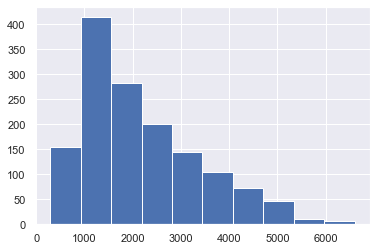

In [13]:
# look at the histogram plot for text length
sns.set()
train_df['char_length'].hist()
plt.show()

Most of the text length are within 500 characters, with some up to 5,000 characters long.

Next, let's examine the correlations among the target variables.

In [14]:
# data = train_df[cols_target]

In [15]:
# colormap = plt.cm.plasma
# plt.figure(figsize=(7,7))
# plt.title('Correlation of features & targets',y=1.05,size=14)
# sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
#            linecolor='white',annot=True)

Indeed, it looks like some of the labels are higher correlated, e.g. insult-obscene has the highest at 0.74, followed by toxic-obscene and toxic-insult.

What about the character length & distribution of the comment text in the test data?

In [16]:
test_df['char_length'] = test_df['Text'].apply(lambda x: len(str(x)))

In [17]:
# # data.astype(float).corr()
# train_df[['ARTS AND CRAFTS', 'CULTURE', 'ECONOMY',
#        'EDUCATION', 'FARMING', 'FLOODING', 'HEALTH', 'LAW/ORDER',
#        'LOCALCHIEFS', 'MUSIC', 'OPINION/ESSAY', 'POLITICS', 'RELATIONSHIPS',
#        'RELIGION', 'SOCIAL', 'SOCIAL ISSUES', 'SPORTS', 'TRANSPORT',
#        'WILDLIFE/ENVIRONMENT', 'WITCHCRAFT', 'char_length']].corr()['char_length']

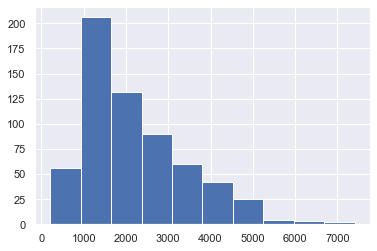

In [18]:
plt.figure()
plt.hist(test_df['char_length'])
plt.show()

Now, the shape of character length distribution looks similar between the training data and the train data. For the training data, I guess the train data were clipped to 5,000 characters to facilitate the folks who did the labelling of the comment categories.

## Clean up the comment text

In [19]:
def clean_text(text):
    text = text.lower()
#     text = re.sub(r"what's", "what is ", text)
#     text = re.sub(r"\'s", " ", text)
#     text = re.sub(r"\'ve", " have ", text)
#     text = re.sub(r"can't", "cannot ", text)
#     text = re.sub(r"n't", " not ", text)
#     text = re.sub(r"i'm", "i am ", text)
#     text = re.sub(r"\'re", " are ", text)
#     text = re.sub(r"\'d", " would ", text)
#     text = re.sub(r"\'ll", " will ", text)
#     text = re.sub(r"\'scuse", " excuse ", text)
#     text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [20]:
# clean the comment_text in train_df [Thanks to Pulkit Jha for the useful pointer.]
train_df['Text'] = train_df['Text'].map(lambda com : clean_text(com))

In [21]:
# clean the comment_text in test_df [Thanks, Pulkit Jha.]
test_df['Text'] = test_df['Text'].map(lambda com : clean_text(com))


## Define X from entire train & test data for use in tokenization by Vectorizer

In [22]:
# train_df = train_df.drop('char_length',axis=1)
# train_df

In [23]:
X = train_df.Text
test_X = test_df.Text

In [24]:
print(X.shape, test_X.shape)

(1436,) (620,)


## Vectorize the data

In [25]:
# import and instantiate TfidfVectorizer
# other_stop_w = pd.read_csv('words_shared_by_all.csv')
# stopw = [item for sublist in other_stop_w.values.tolist() for item in sublist]

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features=45000,max_df = 0.7)
vect

TfidfVectorizer(max_df=0.7, max_features=45000)

In [26]:
# X_dtm.shape

In [27]:
# learn the vocabulary in the training data, then use it to create a document-term matrix
X_dtm = vect.fit_transform(X)
# examine the document-term matrix created from X_train
# np.concatenate([X_dtm.toarray(),train_df['char_length'].values],axis = 0)
# X_dtm.toarray().shape
# train_df['char_length']
train_df['sen_len'] = train_df['Text'].str.split().apply(len).values

In [29]:
# train_df[['ARTS AND CRAFTS', 'CULTURE', 'ECONOMY',
#        'EDUCATION', 'FARMING', 'FLOODING', 'HEALTH', 'LAW/ORDER',
#        'LOCALCHIEFS', 'MUSIC', 'OPINION/ESSAY', 'POLITICS', 'RELATIONSHIPS',
#        'RELIGION', 'SOCIAL', 'SOCIAL ISSUES', 'SPORTS', 'TRANSPORT',
#        'WILDLIFE/ENVIRONMENT', 'WITCHCRAFT', 'char_length','sen_len']].corr()['sen_len']
# train_df[['char_length','sen_len']].values.shape
# from sklearn.preprocessing import StandardScaler
# scale  = StandardScaler()
train_df.drop(['sen_len'], axis = 1 , inplace = True)

# scale.fit_transform(train_df[['char_length','sen_len']])

In [30]:
# train_df[['char_length','sen_len']] = scale.fit_transform(train_df[['char_length','sen_len']])

In [112]:
# train_df[['char_length','sen_len']]

In [31]:
# X_dtm = np.concatenate([X_dtm.toarray(),train_df[['char_length','sen_len']].values],axis = 1)

In [32]:
# transform the test data using the earlier fitted vocabulary, into a document-term matrix
test_X_dtm = vect.transform(test_X)
# examine the document-term matrix from X_test
# test_X_dtm
# test_df['sen_len'] = test_df['Text'].str.split().apply(len).values
# test_df[['char_length','sen_len']] = scale.transform(test_df[['char_length','sen_len']])
# test_X_dtm = np.concatenate([test_X_dtm.toarray(),test_df[['char_length','sen_len']].values],axis = 1)

In [33]:
# from sklearn.decomposition import TruncatedSVD
# svd = TruncatedSVD(n_components=1395, random_state=42)
# X_svd = svd.fit_transform(X_dtm)
# print(f"Total variance explained: {np.sum(svd.explained_variance_ratio_):.2f}")

In [116]:
from tensorflow import keras
layers = keras.layers
models = keras.models
# Build the model
from keras import backend as K 

# Do some code, e.g. train and save model

K.clear_session()
seed_value= 0

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)

model = models.Sequential()
model.add(layers.Dense(1400, input_shape=(45002,)))
# model.add(layers.BatchNormalization())
model.add(layers.Activation('linear'))
model.add(layers.Dropout(0.2))
# model.add(layers.Dense(2048))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
# model.add(layers.Dense(512))
# # model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
# model.add(layers.Dense(128))
# # model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))

# model.add(layers.Dropout(drop_ratio))
model.add(layers.Dense(20))
model.add(layers.Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_dtm, train_df[cols_target], test_size=0.1, random_state = 0,stratify = train_df['Label'])

In [118]:
X_train

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.47036962,  0.55458344],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -1.18677041, -1.17373218],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.77063867, -0.73390993],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.67542904, -0.69674185],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.09938037,  0.04661971],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.70169376, -0.72152057]])

In [121]:
history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=4,
                    verbose=1,
                   validation_split = 0.1)

Epoch 1/4
19/19 [==============================] - 7s 358ms/step - loss: 0.0231 - accuracy: 0.9966 - val_loss: 1.1781 - val_accuracy: 0.6615
Epoch 2/4
19/19 [==============================] - 7s 360ms/step - loss: 0.0177 - accuracy: 0.9974 - val_loss: 1.1709 - val_accuracy: 0.6615
Epoch 3/4
19/19 [==============================] - 7s 361ms/step - loss: 0.0139 - accuracy: 0.9991 - val_loss: 1.1655 - val_accuracy: 0.6615
Epoch 4/4
19/19 [==============================] - 7s 357ms/step - loss: 0.0144 - accuracy: 0.9974 - val_loss: 1.1630 - val_accuracy: 0.6538


In [128]:
# model.evaluate(X_test,y_test)
# X_train
(X_dtm[y_train.index.tolist()] == X_train)

True

## Solving a multi-label classification problem
One way to approach a multi-label classification problem is to transform the problem into separate single-class classifier problems. This is known as 'problem transformation'. There are three methods:
* _**Binary Relevance.**_ This is probably the simplest which treats each label as a separate single classification problems. The key assumption here though, is that there are no correlation among the various labels.
* _**Classifier Chains.**_ In this method, the first classifier is trained on the input X. Then the subsequent classifiers are trained on the input X and all previous classifiers' predictions in the chain. This method attempts to draw the signals from the correlation among preceding target variables.
* _**Label Powerset.**_ This method transforms the problem into a multi-class problem  where the multi-class labels are essentially all the unique label combinations. In our case here, where there are six labels, Label Powerset would in effect turn this into a 2^6 or 64-class problem. {Thanks Joshua for pointing out.}

## Binary Relevance - build a multi-label classifier using Logistic Regression

In [59]:
# # import and instantiate the Logistic Regression model
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_dtm, train_df[cols_target], test_size=0.2, random_state = 0,stratify = train_df['Label'])

# logreg = LogisticRegression(C=12.0,max_iter = 1000,random_state = 0, solver = 'liblinear',class_weight = 'balanced')
# # logreg = SVC(C = 12.0,probability = True, random_state = 0)

# # create submission file
# submission_binary2 = train_df[['ID']+cols_target]
# submission_binary = pd.read_csv('../data/SampleSubmission.csv')

# for label in cols_target:
#     print('... Processing {}'.format(label))
#     y = y_train[label]
#     # train the model using X_dtm & y
#     logreg.fit(X_train, y)
#     # compute the training accuracy
#     y_pred_X = logreg.predict(X_test)
#     print('Validation accuracy is {}'.format(accuracy_score(y_test[label], y_pred_X)))
#     # compute the predicted probabilities for X_test_dtm
#     test_y_prob = logreg.predict_proba(X_dtm)[:,1]
#     submission_binary2[label] = test_y_prob
#     test_y_prob = logreg.predict_proba(test_X_dtm)[:,1]
#     submission_binary[label] = test_y_prob

In [36]:
submission_binary2
# train_df.Label

,ID,POLITICS,HEALTH,LAW/ORDER,RELIGION,FARMING,WILDLIFE/ENVIRONMENT,SOCIAL ISSUES,SOCIAL,OPINION/ESSAY,...,WITCHCRAFT,ECONOMY,SPORTS,RELATIONSHIPS,TRANSPORT,CULTURE,EDUCATION,MUSIC,ARTS AND CRAFTS,FLOODING
0,ID_AASHwXxg,0.846175,0.010979,0.030018,0.024206,0.015822,0.014157,0.103508,0.024171,0.030294,...,0.009009,0.073953,0.018831,0.060238,0.005739,0.012468,0.032560,0.063338,0.016151,0.004327
1,ID_AGoFySzn,0.979331,0.036366,0.035680,0.011837,0.013612,0.022062,0.020058,0.007657,0.004538,...,0.012973,0.043526,0.006606,0.003772,0.006068,0.011711,0.010472,0.004216,0.005209,0.004025
2,ID_AGrrkBGP,0.099776,0.541948,0.042501,0.030690,0.014449,0.013057,0.040091,0.281044,0.043600,...,0.008612,0.044567,0.008547,0.004782,0.008475,0.007690,0.014107,0.006767,0.009113,0.003449
3,ID_AIJeigeG,0.934124,0.014104,0.050031,0.024058,0.013603,0.007309,0.082190,0.007679,0.015571,...,0.020137,0.030053,0.010708,0.007322,0.006991,0.094442,0.014605,0.005479,0.004936,0.004956
4,ID_APMprMbV,0.053886,0.017019,0.936868,0.022953,0.025071,0.010720,0.052500,0.108499,0.056771,...,0.029175,0.021845,0.017558,0.009876,0.020617,0.031289,0.010193,0.010148,0.013576,0.004692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,ID_zmTmmEio,0.020104,0.030378,0.048757,0.031741,0.020078,0.264802,0.047061,0.093825,0.021892,...,0.006036,0.081793,0.009399,0.004947,0.992785,0.005812,0.018487,0.005334,0.006871,0.002097
1432,ID_znOlIaGQ,0.671227,0.036257,0.042815,0.035348,0.014531,0.014378,0.036230,0.025980,0.055162,...,0.012586,0.102271,0.011706,0.003894,0.008827,0.017278,0.010333,0.008019,0.007524,0.004741
1433,ID_znracTjN,0.123041,0.058167,0.091346,0.176290,0.013611,0.009730,0.165680,0.067423,0.023180,...,0.007045,0.017157,0.215624,0.004159,0.142433,0.007170,0.945114,0.011856,0.253486,0.003418
1434,ID_ztdsmmva,0.046542,0.017343,0.049037,0.025178,0.016378,0.007493,0.782909,0.025913,0.087650,...,0.024333,0.021173,0.032915,0.070421,0.005017,0.023565,0.025597,0.352236,0.020496,0.003142


In [33]:
label = 'POLITICS'
print('... Processing {}'.format(label))
y = y_train[label]
# train the model using X_dtm & y
logreg.fit(X_train, y)
# compute the training accuracy
y_pred_X = logreg.predict(X_test)
print('Validation accuracy is {}'.format(accuracy_score(y_test[label], y_pred_X)))

... Processing POLITICS
Validation accuracy is 0.9131944444444444


In [44]:
([(y_test[label] == y_pred_X)]).index

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [37]:
submission_binary = submission_binary[['ID']+list(lb.classes_)]
submission_binary['Label'] = lb.inverse_transform(submission_binary[list(lb.classes_)].values)
submission_b = submission_binary[['ID','Label']]
submission_b
# lb.classes_
# submission_binary

,ID,Label
0,ID_ADHEtjTi,SOCIAL ISSUES
1,ID_AHfJktdQ,RELIGION
2,ID_AUJIHpZr,RELATIONSHIPS
3,ID_AUKYBbIM,SOCIAL ISSUES
4,ID_AZnsVPEi,HEALTH
...,...,...
615,ID_zdpOUWyJ,SOCIAL
616,ID_zhnOomuu,RELATIONSHIPS
617,ID_zmWHvBJb,LAW/ORDER
618,ID_zphjdFIb,SOCIAL ISSUES


In [58]:
train_df['pred_label'] = submission_b['Label']

In [61]:
train_df.groupby('Label').get_group(cols_target[0]).pred_label.unique()

array(['POLITICS', 'LAW/ORDER', 'RELIGION', 'HEALTH', 'SOCIAL', 'ECONOMY',
       'SOCIAL ISSUES', 'EDUCATION'], dtype=object)

In [62]:
train_df.groupby('Label').get_group(cols_target[1]).pred_label.unique()

array(['HEALTH', 'RELIGION', 'ECONOMY', 'LAW/ORDER', 'POLITICS'],
      dtype=object)

In [89]:
i = i +1
train_df.groupby('Label').get_group(cols_target[i]).pred_label.value_counts()


WITCHCRAFT       13
LAW/ORDER         2
SOCIAL ISSUES     1
Name: pred_label, dtype: int64

In [78]:
# train_df.groupby('Label').get_group(cols_target[3]).pred_label.unique()
i=-1

In [65]:
train_df.groupby('Label').get_group(cols_target[4]).pred_label.unique()

array(['FARMING', 'POLITICS'], dtype=object)

In [38]:
(pd.read_csv('submission_binary2.csv').Label == submission_b.Label).sum()
# logreg.predict(X_test)
# y_pred_X.shape
# y_test.shape
# cols_target.index(cols_target[0])
# y_test
# accuracy_score(lb.inverse_transform(submission_binary[cols_target].values), lb.inverse_transform(y_test.values))
# (submission_binary[cols_target].values.max(axis =1)>0.7).sum()

576

In [70]:
test_X[1]

'ambuye ziyaye ayamikira aphunzitsi a tilitonse arkiepiskopi wa arkidayosizi ya lilongwe, ambuye tarcizio ziyaye wayamikira mgwirizano omwe ulipo pakati pa amphunzitsi a ana a tilitonse komanso atsogoleri osiyanasiyana a mu mpingo wakatolika. iwo amayakhula izi ku parish ya st. johns msamba pa mwambo wa chaka cha epiphania chomwe arkidayosiziyo imachita loweruka lililonse lotsatira lamulungu la epiphania pa dziko lonse. ambuye ziyaye: aphunzitsi akugwira ntchito yotamandika ambuye ziyaye alimbikitsa ana mdziko muno kuti azilimbikira maphunziro a ku sukulu komanso a tilitonse ndi cholinga choti adzitumikira bwino ngati ana komanso kukhala mzika zodalirika za dziko lino. episkopi ntchito yake ndi kuphunzitsa anthu zinthu za mu mpingo koma ine sindingakwanitse chifukwa sindimakhala ku parishi iliyonse. ntchito imeneyi amandithandiza ndi aphunzitsi amenewa ndipo ndikuti zikomo kwambiri mukugwira ntchito yotamandika, anatero ambuye ziyaye. pothilirapo ndemanga mkulu wa mu ofesi yoona za mab

In [31]:
train_df.shape

(1436, 23)

### Create submission file

In [ ]:
submission_binary.head()

In [39]:
# generate submission file
submission_b.to_csv('submission_binary13.csv',index=False)

#### Binary Relevance with Logistic Regression classifier scored 0.074 on the public leaderboard.

## Classifier Chains - build a multi-label classifier using Logistic Regression

In [ ]:
# create submission file
submission_chains = pd.read_csv('../data/SampleSubmission.csv')

# create a function to add features
def add_feature(X, feature_to_add):
    '''
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    '''
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [ ]:
y.shape

In [ ]:
for label in cols_target:
    print('... Processing {}'.format(label))
    
    
    
#     print('... Processing {}'.format(label))
#     y = y_train[label]
#     # train the model using X_dtm & y
#     logreg.fit(X_train, y)
#     # compute the training accuracy
#     y_pred_X = logreg.predict(X_test)
#     print('Validation accuracy is {}'.format(accuracy_score(y_test[label], y_pred_X)))
#     # compute the predicted probabilities for X_test_dtm
#     test_y_prob = logreg.predict_proba(test_X_dtm)[:,1]
#     submission_binary[label] = test_y_prob
    
    
    y = y_train[label]
    # train the model using X_dtm & y
    logreg.fit(X_train,y)
    # compute the training accuracy
    y_pred_X = logreg.predict(X_test)
    print('Validation Accuracy is {}'.format(accuracy_score(y_test[label],y_pred_X)))
    # make predictions from test_X
    test_y = logreg.predict(test_X_dtm)
    test_y_prob = logreg.predict_proba(test_X_dtm)[:,1]
    submission_chains[label] = test_y_prob
    # chain current label to X_dtm
    X_dtm = add_feature(X_train, y)
    print('Shape of X_dtm is now {}'.format(X_dtm.shape))
    # chain current label predictions to test_X_dtm
    test_X_dtm = add_feature(test_X_dtm, test_y)
    print('Shape of test_X_dtm is now {}'.format(test_X_dtm.shape))

### Create submission file

In [ ]:
# # submission_chains.head()
# # add_feature(X_dtm, y)
# from scipy.sparse import csr_matrix, hstack
# hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [ ]:
# generate submission file
submission_chains.to_csv('submission_chains.csv', index=False)

## Create a combined submission

In [ ]:
# create submission file
submission_combined = pd.read_csv('../input/sample_submission.csv')

Combine using simple average from Binary Relevance and Classifier Chains.

In [ ]:
# corr_targets = ['obscene','insult','toxic']
for label in cols_target:
    submission_combined[label] = 0.5*(submission_chains[label]+submission_binary[label])

In [ ]:
submission_combined.head()

In [ ]:
# generate submission file
submission_combined.to_csv('submission_combined.csv', index=False)

### Thanks for reading my kernel.
### Tips and comments are most welcomed & appreciated.
### Please upvote if you find it useful.

In [74]:
# with open("..\Vectors\wiki.ny.bin", "r",encoding = 'latin') as file:
#     first_line = file.readline(3)
# LGBM

import lightgbm as lgb


params = {
    'max_depth': 40,
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'multiclassova',
    'num_class': 20,
    'metric': 'multi_logloss',
    'num_leaves': 20,
    'learning_rate': 0.001,
    'feature_fraction': 0.2,
    'bagging_fraction': 0.8,
    'bagging_freq': 2,
    'lambda_l1': 0,
    'lambda_l2': 1,
    'verbose': -1
}

len_train = X_dtm.shape[0]
num_folds = 5
test_x = test_X_dtm.copy()
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

le = LabelEncoder()

target2 = le.fit_transform(train_df['Label']) 
oof_preds = np.zeros([len_train])
sub_preds = np.zeros([test_x.shape[0],20])
folds = KFold(n_splits=num_folds, shuffle=True, random_state=4564)
for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X_dtm)):
    lgb_train = lgb.Dataset(X_dtm[train_idx], target2[train_idx])
    lgb_valid = lgb.Dataset(X_dtm[valid_idx], target2[valid_idx])
        
    # train
    gbm = lgb.train(params, lgb_train, 10000, valid_sets=[lgb_train, lgb_valid], early_stopping_rounds=20, verbose_eval=100)
    pr1 = gbm.predict(X_dtm[valid_idx], num_iteration=gbm.best_iteration)
    pr2 = gbm.predict(test_x, num_iteration=gbm.best_iteration)
    oof_preds[valid_idx] = pr1.argmax(axis=1)
    sub_preds += pr2 / folds.n_splits
    valid_idx += 1
sub_preds = sub_preds.argmax(axis=1)
e = (target2==oof_preds).mean()
print('Full validation score/error %.4f/%.4f' %(e,1-e))

Training until validation scores don't improve for 20 rounds
[100]	training's multi_logloss: 2.3774	valid_1's multi_logloss: 2.42839
[200]	training's multi_logloss: 2.19889	valid_1's multi_logloss: 2.31716
[300]	training's multi_logloss: 2.0455	valid_1's multi_logloss: 2.22655
[400]	training's multi_logloss: 1.91076	valid_1's multi_logloss: 2.15344
[500]	training's multi_logloss: 1.79189	valid_1's multi_logloss: 2.09068
[600]	training's multi_logloss: 1.68425	valid_1's multi_logloss: 2.03543
[700]	training's multi_logloss: 1.5876	valid_1's multi_logloss: 1.98829
[800]	training's multi_logloss: 1.49983	valid_1's multi_logloss: 1.94916
[900]	training's multi_logloss: 1.41979	valid_1's multi_logloss: 1.91535
[1000]	training's multi_logloss: 1.34701	valid_1's multi_logloss: 1.8874
[1100]	training's multi_logloss: 1.27951	valid_1's multi_logloss: 1.86272
[1200]	training's multi_logloss: 1.217	valid_1's multi_logloss: 1.84052
[1300]	training's multi_logloss: 1.15907	valid_1's multi_logloss: 

[2400]	training's multi_logloss: 0.73392	valid_1's multi_logloss: 1.78133
[2500]	training's multi_logloss: 0.706358	valid_1's multi_logloss: 1.77695
[2600]	training's multi_logloss: 0.680124	valid_1's multi_logloss: 1.77346
[2700]	training's multi_logloss: 0.655381	valid_1's multi_logloss: 1.77093
Early stopping, best iteration is:
[2710]	training's multi_logloss: 0.653034	valid_1's multi_logloss: 1.77077
Training until validation scores don't improve for 20 rounds
[100]	training's multi_logloss: 2.37665	valid_1's multi_logloss: 2.43921
[200]	training's multi_logloss: 2.19928	valid_1's multi_logloss: 2.32411
[300]	training's multi_logloss: 2.04806	valid_1's multi_logloss: 2.23466
[400]	training's multi_logloss: 1.91345	valid_1's multi_logloss: 2.15669
[500]	training's multi_logloss: 1.79468	valid_1's multi_logloss: 2.0931
[600]	training's multi_logloss: 1.6886	valid_1's multi_logloss: 2.03813
[700]	training's multi_logloss: 1.59264	valid_1's multi_logloss: 1.99106
[800]	training's mult

In [75]:
# first_line
# !pip install gzip
# import gzip
test_df['Label']  = le.inverse_transform(sub_preds)
# lb.inverse_transform(sub_preds)

In [76]:
# with gzip.open("..\Vectors\en-ny.xml.gz", mode='rb', compresslevel=9, encoding=None, errors=None, newline=None) as f:
#     file_content = f.read()
sub = test_df[['ID','Label']]
sub
# sub_preds

,ID,Label
0,ID_ADHEtjTi,LAW/ORDER
1,ID_AHfJktdQ,RELIGION
2,ID_AUJIHpZr,RELATIONSHIPS
3,ID_AUKYBbIM,LAW/ORDER
4,ID_AZnsVPEi,FARMING
...,...,...
615,ID_zdpOUWyJ,SOCIAL
616,ID_zhnOomuu,RELATIONSHIPS
617,ID_zmWHvBJb,LAW/ORDER
618,ID_zphjdFIb,SOCIAL ISSUES


In [77]:
# file_content
sub.to_csv('lgbm_sub.csv', index = False)

In [99]:
(pr2.max(axis = 1)>0.6).sum()

102

In [73]:
# oof_preds
le.inverse_transform([3])

array(['EDUCATION'], dtype=object)